#              Изучение рынка компьютерных игр в Европе, Северной Америке и Японии

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

 # План

**Шаг 1. Откроем файл с данными и изучим общую информацию**

**Шаг 2. Предобработка данных**
- Заменяем названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы
- Обработаем пропуски при необходимости:
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

**Шаг 3. Исследовательский анализ данных**

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


**Шаг 4. Портрет пользователя каждого региона**
- Определите для пользователя каждого региона (NA, EU, JP):
-Самые популярные платформы (топ-5). Опишите различия в долях продаж.
-Самые популярные жанры (топ-5). Поясните разницу.
-Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверка гипотез**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 6. Общий вывод**

# Шаг 1. Откроем файл с данными и изучим общую информацию

In [133]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib import cm

In [134]:
data=pd.read_csv('/datasets/games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


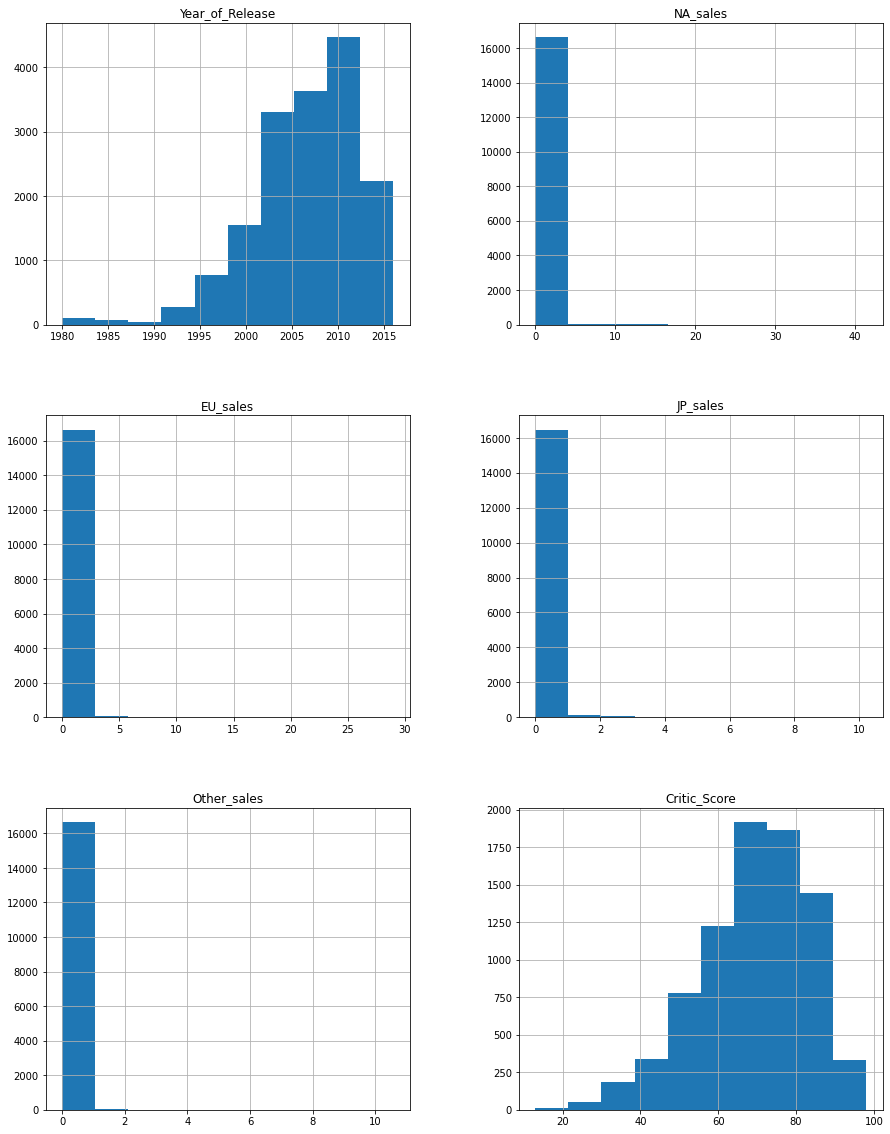

In [135]:
data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Видим, что игры начались выпускаться с 1980 года, но количество выпущенных игр с 1980 по 1995 слишком мало по сравнению за период 1995-2016, тк индустрия и технологии только начали развиваться
    
Также наблюдаем, что количество купленных игр в Европе и Северной Америке гораздо больше по сравнению с Японией, но Япония опередает категорию другие страны.
    
Оценки критиков в основном колеблятся от 50 до 90, что говоорит о сильном размахе оценок игр
    
    
</div>

# Предобработка данных

In [136]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [137]:
data.columns = data.columns.str.lower()

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [139]:
data.shape

(16715, 11)

In [140]:
rows=len(data.axes[0])
rows

16715

In [141]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в:
- name - название игры. Вероятнее всего связано с технической ошибкой. Пропусков всего 2 так что можем удалить эти строки
- year_of_release - год выпуска. Так же как и в случае с name вероятнее всего техническая ошибка. Пропуск оставим, тк ничего нельзя сказать по этому поводу.
- genre - жанр игры. То же самое. Удалим
- critic_score - оценка критиков оценка пользователей
- user_score - оценка пользователей 

пропуски в двух верних столбцах могут быть связаны, как с технической ошибкой, так и возможно, с непопулярностью игр, из-за чего нельзя определить их оценку 
- rating - рейтинг от организации ESRB, аналогично

In [142]:
data['name'].dropna(inplace=True)
data['genre'].dropna(inplace=True)
data['year_of_release']=data['year_of_release'].fillna(0)

Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Эта аббревиатура обозначает подлежит определению, то есть игра еще не получила свой рейтинг, в связи с тем что игра вышла недавно

In [143]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['rating']=data['rating'].fillna('NC')

Заменим тип данных для:
- user_score на float, тк обрабатываем оценки пользоваталей об игре, чтобы работать со значеними, как с числами

In [144]:
data['user_score']=data['user_score'].astype('float')
data.drop(index=data.query('year_of_release ==0 ').index,inplace=True)
data['year_of_release']=data['year_of_release'].astype('int')

In [145]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [146]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,7463.000000,16446.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,68.994363,7.126330,0.536105
std,5.877050,0.818416,0.506696,0.311082,0.187994,13.920060,1.499447,1.558763
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Нет значений, которые бы сильно выбивались, так что на данном этапе оставим датафрейм в таком виде

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Удалили ячейки с пропусками в годах, жанре и имени, их количество гораздо меньше исходного, так что на исследование это не повлияет
    
Также получилось много пропусков в столбцах rating, critic_score, user_score. Их мы оставим, тк эти данные нельзя просто так отбросить, потому что ещё могут пригодиться для дальнейшего анализа.
    
    
</div>

# Шаг 3. Исследовательский анализ данных

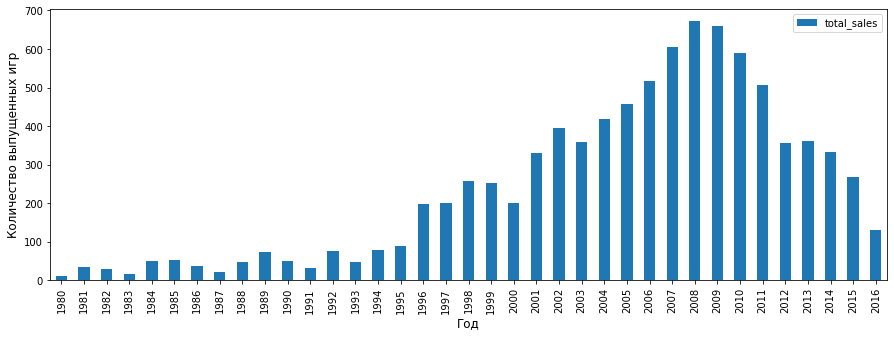

In [147]:
data.pivot_table(index='year_of_release', values='total_sales' ,aggfunc='sum').plot(y="total_sales", kind='bar',figsize=(15,5))
plt.xlabel('Год', size=12)
plt.ylabel('Количество выпущенных игр', size=12)
plt.show()

Видим, что игры начались выпускаться с 1980 года, но количество выпущенных игр с 1980 по 1995 слишком мало по сравнению за период 1995-2016, так что данные до 95 года не нужны

In [148]:
data.drop(index=data.query('year_of_release<1995').index,inplace=True)

In [149]:
platform_top = data.pivot_table(index='platform', values='total_sales' ,aggfunc='sum')
platform_top.sort_values(by=['total_sales'],ascending=False, inplace=True)
platform_top = platform_top.iloc[:10]
display(platform_top)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot:xlabel='platform'>

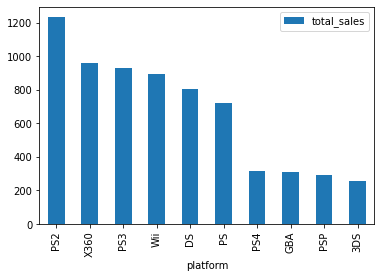

In [150]:
platform_top.plot(y="total_sales", kind='bar')

In [151]:
# код ревьюера
platform_top.index.to_list()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

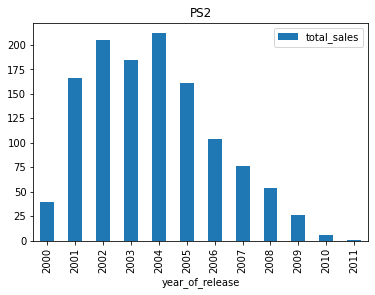

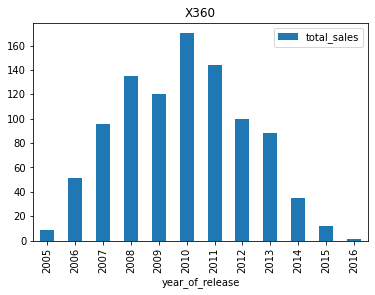

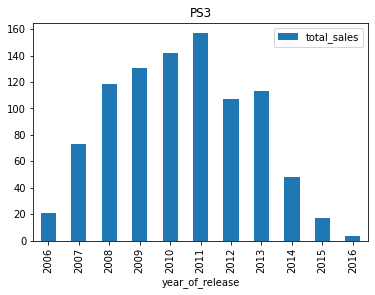

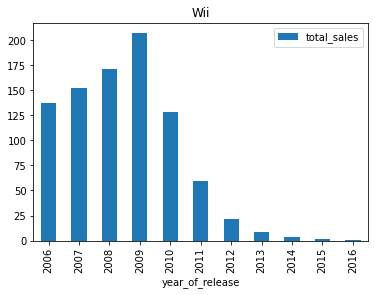

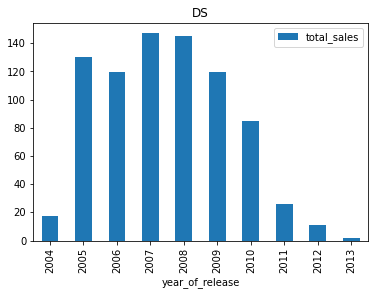

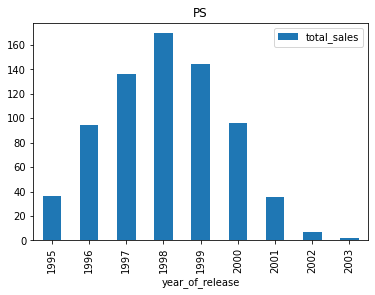

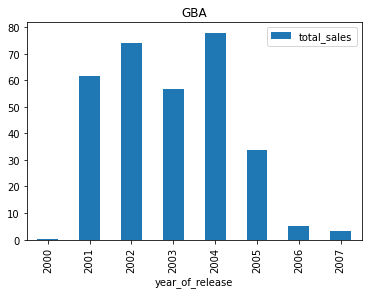

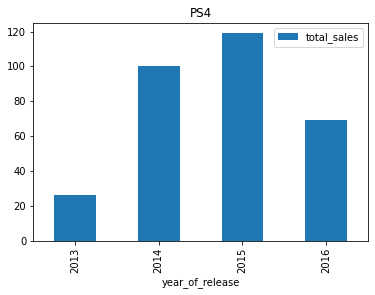

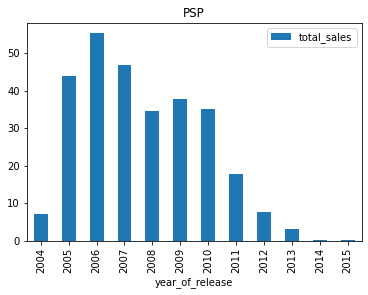

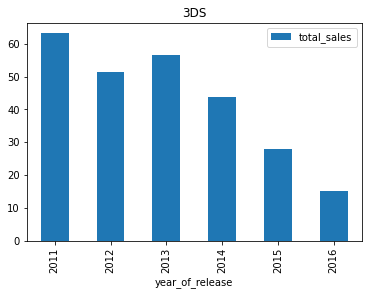

In [152]:
platform_top_10=['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP','3DS']
for a in platform_top_10:
    data[data['platform'] == a].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar',title=a)

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
При обнаружении пропусков удалил пропуски в столбцах year_of_release и изменил тип данных на int, теперь отображается без точки
    
</div>

- PS2 просуществовала с 2000 по 2010 
- X360 - c 2006 по 2015
- PS3 - с 2006 по 2015
- Wii - с 2006 по 2012
- DS - с 2004 по 2012
- PS - с 1995 по 2001
- GBA - с 2001 по 2005
- PS4 - с 2013 по 2016
- PSP - с 2004 по 2013
- 3DS - с 2011 по 2016

Платформы компаний-гигантов существуют порядка 10 лет, далее на замену приходит новая платформа 

Другие платформы сущетсвуют порядка 5 лет

Актуальным периодом будем считать период 2013-2016, так как многие старые компании хоть и падают, но демонстрируют хорошие продажи, и появились новые компании, составляющие конкуренцию 

In [153]:
data_2013=data.query('year_of_release >= 2013')
platform_top_2013 = data_2013.pivot_table(index='platform', values='total_sales' ,aggfunc='sum')
platform_top_2013.sort_values(by=['total_sales'],ascending=False, inplace=True)
display(platform_top_2013)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


<AxesSubplot:xlabel='year_of_release'>

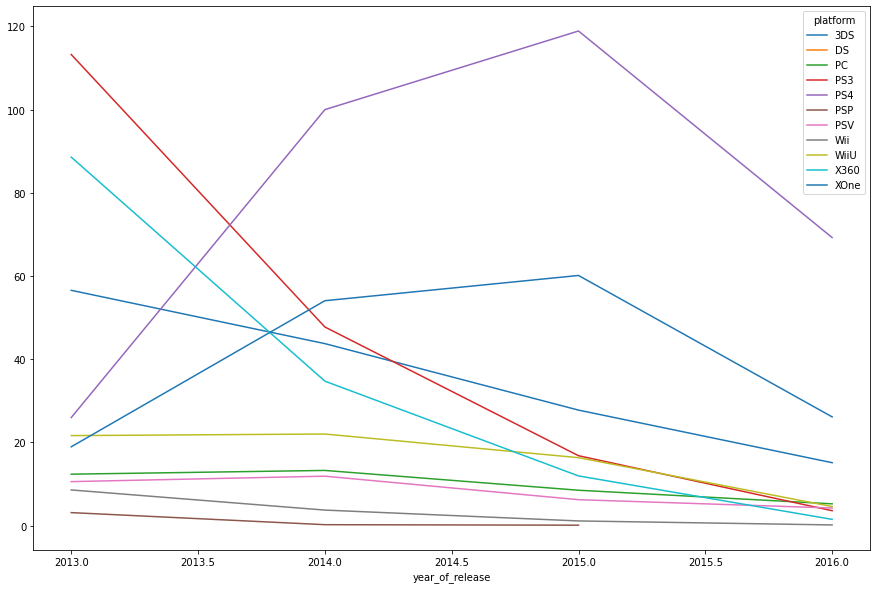

In [154]:
data_2013.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 10))

Потенциально прибыльными могут стать PS4 и XOne

In [155]:
top_platform= platform_top_2013.iloc[:10]

<AxesSubplot:>

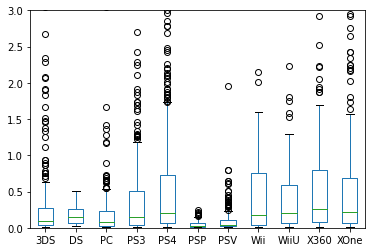

In [156]:
data_2013.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,3))

Можем наблюдать несколько интересных моментов:
- у многих компаний имеются выбросы
- x360 имеют лучшее медианное значение, но связано это с пиком продаж приходящимся на начало актуального периода 
- также подтвердился выбор PS4 и Xone имеют самые высокие медианные значения

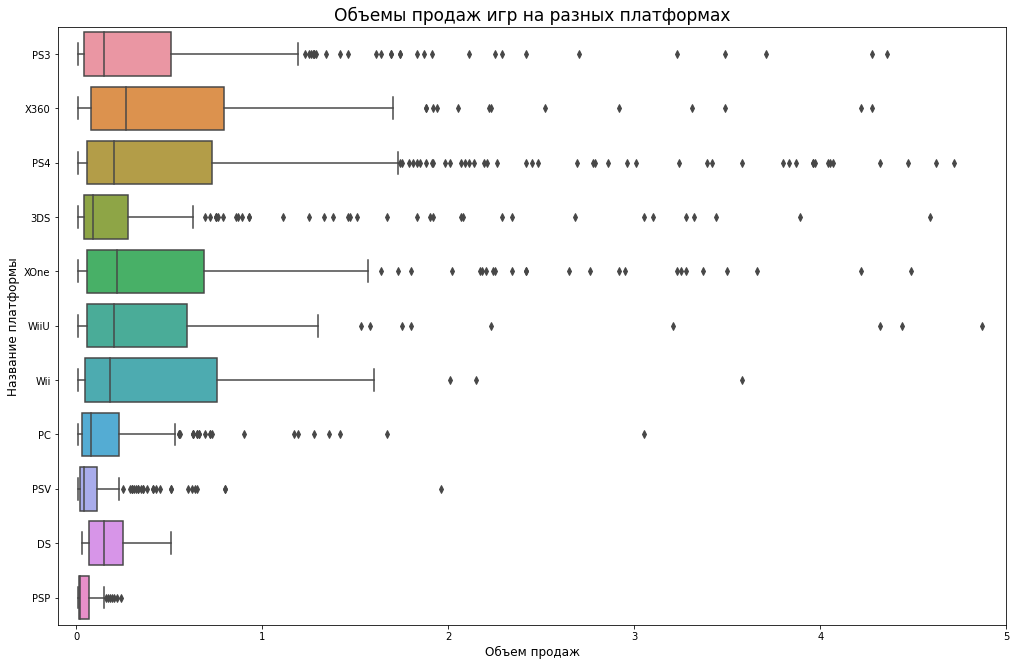

In [157]:
# код ревьюера

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 11))
sns.boxplot(data=data_2013, y='platform', x='total_sales')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

Для диаграммы рассеивания возьмем PS4 и XOne находящийся на пике популярности к 2017 года, а также компанию 3DS, показывающую хорошие продажи в течение всего актуального периода

Матрица корреляций для XOne


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


Матрица корреляций для PS4


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Матрица корреляций для 3DS


,critic_score,user_score,total_sales
critic_score,1.000000,0.769536,0.357057
user_score,0.769536,1.000000,0.241504
total_sales,0.357057,0.241504,1.000000


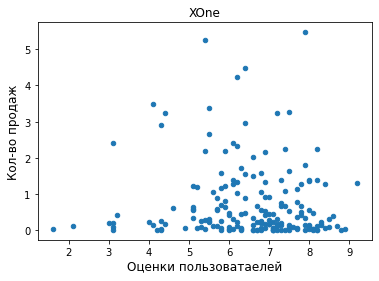

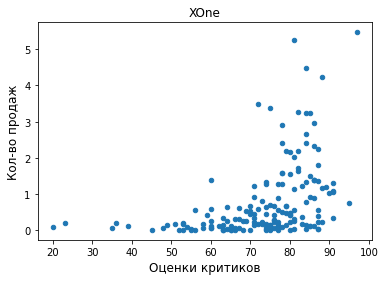

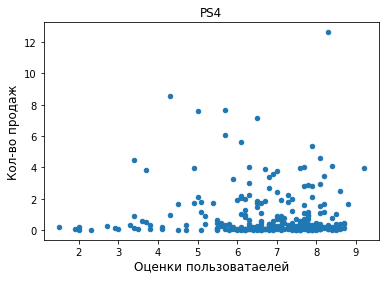

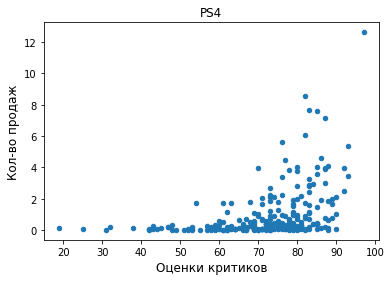

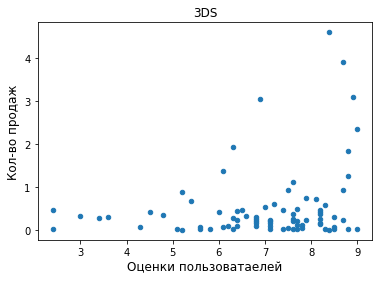

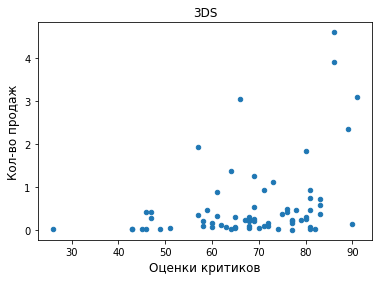

In [158]:
platformd=['XOne','PS4','3DS']
for a in platformd:
    b=data_2013.query('platform == @a')
    b.plot(x='user_score', y='total_sales', kind='scatter',title=a)
    plt.xlabel('Оценки пользоватаелей', size=12)
    plt.ylabel('Кол-во продаж', size=12)
    b.plot(x='critic_score', y='total_sales', kind='scatter',title=a)
    plt.xlabel('Оценки критиков', size=12)
    plt.ylabel('Кол-во продаж', size=12)
    print('Матрица корреляций для', a)
    display(b[['critic_score','user_score', 'total_sales']].corr())


Интересно заметить, что оценки критиков  влияют на кол-во продаж, в то время как оценки игроков не имеют такого влияния, при этом при рассмотрении компании 3DS, можем заметить что такого эффекта не наблюдается.

Также оценки критиков и игроков чаще совпадают у 3DS

Из этого можно сделать вывод, что для компаний имеющих высокое количество продаж и стоящих на рынке одними из первых, количество продаж будет зависеть именно от оценок критиков, когда на платформах ниже продажи зависят не только от них, но и от оценок пользователей

In [159]:
data_genre=data_2013.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'})
data_genre['itog']=data_genre['total_sales'] / data_genre['name']
data_genre=data_genre.sort_values(by='itog', ascending=False)
data_genre

,name,total_sales,itog
genre,,,
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972
Platform,74,42.63,0.576081
Role-Playing,292,145.89,0.499623
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Action,766,321.87,0.420196
Misc,155,62.82,0.405290
Simulation,62,21.76,0.350968


<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Получили топ5 где первое место занимают шутеры, но категория platform закрепилась в топ 3
</div>

# Шаг 4. Портрет пользователя каждого региона

In [160]:
data_2013.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').iloc[:5]

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [161]:
data_2013.pivot_table(index = 'platform', values ='na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').iloc[:5]

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [162]:
data_2013.pivot_table(index = 'platform', values ='jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').iloc[:5]

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


In [163]:
print('Количество суммарных продаж в Европе',data_2013.pivot_table(index = 'platform', values ='eu_sales', aggfunc = 'sum').sum())
print('Количество суммарных продаж в Cеверной Америке',data_2013.pivot_table(index = 'platform', values ='na_sales', aggfunc = 'sum').sum())
print('Количество суммарных продаж в Японии',data_2013.pivot_table(index = 'platform', values ='jp_sales', aggfunc = 'sum').sum())

Количество суммарных продаж в Европе eu_sales    392.23
dtype: float64
Количество суммарных продаж в Cеверной Америке na_sales    437.71
dtype: float64
Количество суммарных продаж в Японии jp_sales    140.78
dtype: float64


In [164]:

data_2013.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


/tmp/ipykernel_31/3905168978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2013['platform_name'] = (
/tmp/ipykernel_31/3905168978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2013['platform_name'] = (
/tmp/ipykernel_31/3905168978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

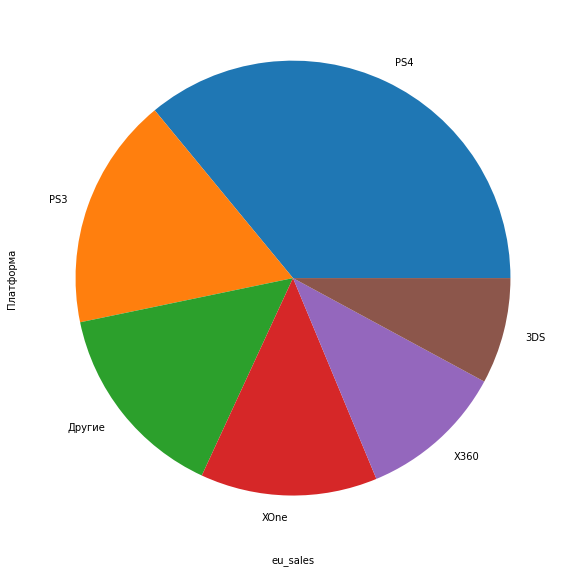

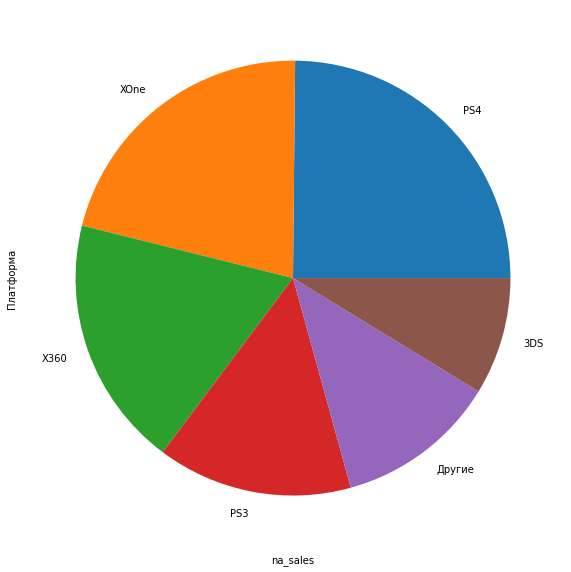

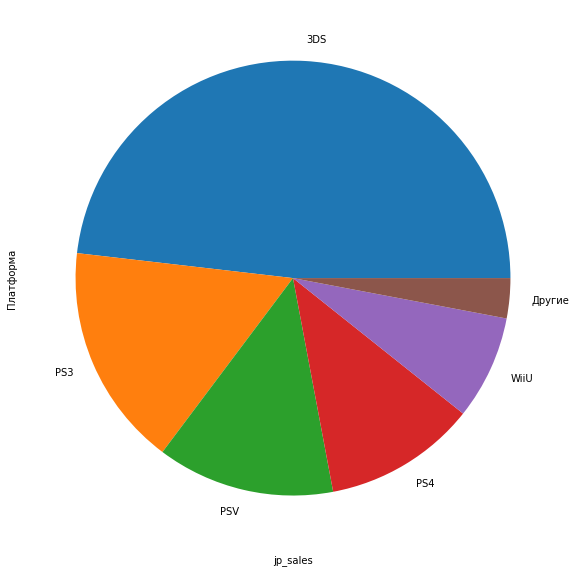

In [165]:
countries=['eu_sales', 'na_sales','jp_sales']
for a in countries:
    b=data_2013.pivot_table(index = 'platform', values = a, aggfunc = 'sum').sort_values(ascending=False, by = a)
    if a!='jp_sales': 
        big_comp=["PS4","PS3","XOne","X360","3DS"]
    else:
        big_comp=['3DS','PS3','PSV','PS4','WiiU']
    data_2013['platform_name'] = (
    data_2013['platform']
    .where(data_2013['platform'].isin(big_comp), 'Другие')
)
    data_2013.pivot_table(index = 'platform_name', values = a, aggfunc = 'sum').sort_values(ascending=False, by = a).plot(kind='pie', figsize=(10,10), y= a)
    plt.xlabel(a)
    plt.ylabel('Платформа')
    plt.legend('', frameon =False)

Топ 5 платформ жителей Северной Америки и Европы совпадают, отличается только расположение в этом топе. При этом количество покупок в странах Европы и Северной Америки гораздо больше, чем в Японии.

В Японии топ5 платформ отличается. Причем на первом месте стоит платформа 3DS, являющееся платформой нинтендо, которая в свою очередь является как раз японской. То есть в японии ориентир именно на отечественного производителя

In [166]:
data_2013.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'median').sort_values(ascending=False, by = 'eu_sales').iloc[:5]

,eu_sales
genre,
Shooter,0.190
Platform,0.080
Racing,0.060
Sports,0.050
Simulation,0.035


In [167]:
data_2013.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'median').sort_values(ascending=False, by = 'na_sales').iloc[:5]

,na_sales
genre,
Shooter,0.200
Platform,0.090
Sports,0.080
Fighting,0.045
Racing,0.030


In [168]:
data_2013.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'median').sort_values(ascending=False, by = 'jp_sales').iloc[:5]

,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Misc,0.02
Puzzle,0.02
Action,0.01


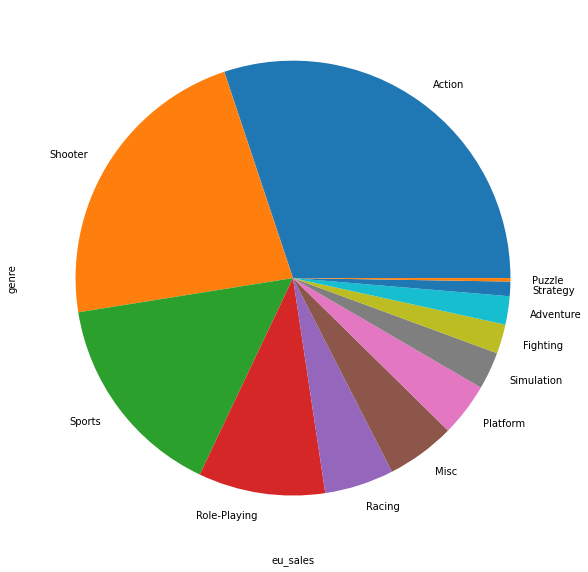

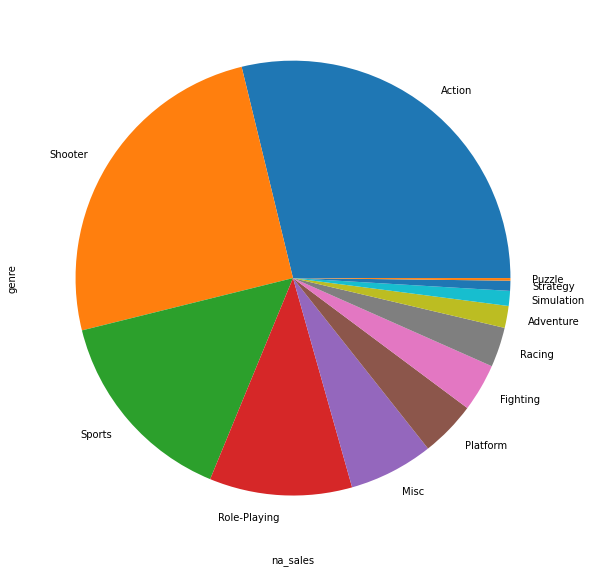

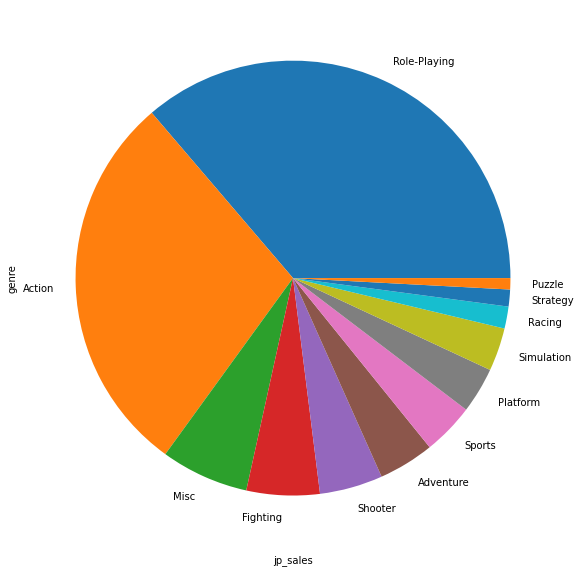

In [169]:
countries=['eu_sales', 'na_sales','jp_sales']
for a in countries:

    data_2013.pivot_table(index = 'genre', values = a, aggfunc = 'sum').sort_values(ascending=False, by = a).plot(kind='pie', figsize=(10,10), y= a)
    plt.xlabel(a)
    plt.ylabel('genre')
    plt.legend('', frameon =False)
    

И опять топ 5 жанров Северной Америки и Европы совпадает, когда у японии лидирует жанр Role-Playing

In [170]:
data_2013.pivot_table(index = 'rating', values = ['eu_sales','na_sales','jp_sales'], aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
NC,78.91,85.05,89.42
T,41.95,20.59,49.79


Рейтинг E обозначает длля всех

Рейтинг Е10+ - старше 10 лет

Рейтинг M - старше 17 лет

Рейтинг Т - старше 13 лет

Из сводной таблицы видим что категории старше 10 и 13 лет покупались гораздо реже в странах Северной Америки и Европы,лидерами продаж стали игры категории старше 17 лет

В то время как в японии игры старше 13 лет покупались больше всего. А количество проданных игр категории для всех и старше 17 лет примерно равно

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Действительно обозначив отсутствие категории за NC получили значение сильно влияющее на анализ, вероятнее всего к этой категории относятся новинки, еще не получившие категорию. Видно, что в каждом из рынков покупка новинок занимает значительную часть продаж, особенно в Японии где это превышает в несколько раз второе место
</div>

# Проверка гипотез

Гипотезы:

средние пользовательские рейтинги платформ Xbox One и PC одинаковые

средние пользовательские рейтинги жанров Action и Sports разные

**Гипотеза 1**
средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные

In [171]:
from scipy import stats as st
import numpy as np
sample_1 = data_2013[(data_2013['platform'] == 'XOne') &  (data_2013['user_score'] > 0)]['user_score']
sample_2 = data_2013[(data_2013['platform'] == 'PC') &  (data_2013['user_score'] > 0)]['user_score']
alpha = 0.05 
results = st.ttest_ind(sample_1, sample_2,)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Мы не можем отвергнуть нулевую гипотезу, значит с большей долей вероятности  что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Гипотеза 2** средние пользовательские рейтинги жанров Action и Sports разные

нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые

альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные

In [172]:
sample_1 = data_2013[(data_2013['genre'] == 'Action') &  (data_2013['user_score'] > 0)]['user_score']
sample_2 = data_2013[(data_2013['genre'] == 'Sports') &  (data_2013['user_score'] > 0)]['user_score']
alpha = 0.05 
results = st.ttest_ind(sample_1, sample_2,)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Можем отвергнуть нулевую гипотезу, значит с большей долей вероятности средние пользовательские рейтинги жанров Action и Sports разные
</div>

# Общий вывод

- На этапе предобработки обработали пропуски: удалили строки с пустым названием игры, неизвестным годом выпуска, заменили неизвестные данные в столбце категории на NC(no category)

- Срок жизни платформы крупной компаниии - 10 лет, у других - 5 лет
- Определили потенциально прибыльный платформы Xone и PS4
- Для компаний имеющих высокое количество продаж и стоящих на рынке одними из первых, количество продаж будет зависеть именно от оценок критиков, когда на платформах ниже продажи зависят не только от них, но и от оценок пользователей
- Жанры action,shooter, sports,Role-Playing самые покупаемые жанры игр, но самые прибыльные Platform, Sports, Shooter, Role-Playing, Racing
- Тип игр, которые вероятнее всего принесут хорошую прибыль в Европе:
 - выходят на платформах PS4,PS3,XOne,X360,3DS; 
 - причем стоит обратить внимание в первую очередь на PS4 и XOne, тк они являются наиболее востребованными платформами к 2017 году и занимают порядка 50% рынка
 - Жанры: Platform, Sports, Shooter, Simulation, Racing
 - Рейтинг: M и E
- Cеверной Америке:
 - платформы: PS4,PS3,XOne,X360,3DS, аналогично европейскому рынку в первую очередь рассматривать PS4 и XOne
 - Жанры: Platform, Sports, Shooter, Simulation, Racing
 - Рейтинг: M и E

рынок Америки и Европы похож, так что компаниям легко ориентироваться сразу на два рынка
- Япония:
 - Платформы:3DS,PS3,PSV,PS4,WiiU, при этом ориентироваться стоит именоо на 3DS так как занимает больше половина рынка платформ	
 - Жанры: Role-Playing,Action,Misc,Fighting,Puzzle
 - Рейтинг: T,E,M
 
 Остается неопреденность с категорией NC так как вероятнее всего в Японии какую-то категорию игр не принятно обозначать, так как слишком много покупок, так что к японскому рынку стоит добавить эту категорию